### Import all the neccesary libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

### Task #1: Merge the 12 months of sales data into a single CSV files

In [9]:
files = [file for file in  os.listdir("C:/Users/PC/Desktop/Sales_Data")] 

#print(files)
all_month_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("C:/Users/PC/Desktop/Sales_Data/"+file)
    all_month_data = pd.concat([all_month_data, df])
all_month_data.to_csv("C:/Users/PC/Desktop/all_data.csv", index=False)                                      

In [10]:
df = pd.read_csv('C:/Users/PC/Desktop/all_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data!

Drop NaN

In [11]:
nandf = df[df.isna().any(axis=1)]
#nandf.head()
df = df.dropna(how="all")

In [12]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


find "Or" and delete it

In [14]:
df = df[df["Order Date"].str[0:2] != "Or"]

convert column to the corect type

In [15]:
df['Quantity Ordered'] = pd.to_numeric(df["Quantity Ordered"]) #make int
df['Price Each'] = pd.to_numeric(df["Price Each"]) #make float

### Augment data with additional columns

### Task 2: add month column

In [16]:
df["Month"] = df["Order Date"].str[0:2]
df["Month"] = df["Month"].astype('int32')

In [17]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


### Task 3: add a sales column

In [18]:
df["Sales"] = df["Quantity Ordered"] * df["Price Each"]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


### Task 4: add a city column

In [21]:
def get_address(Address):
    return Address.split(',')[1]
def get_state(Address):
    return Address.split(',')[2].split(' ')[1]

df["City"] = df["Purchase Address"].apply(lambda x: f"{get_address(x)} ({get_state(x)})")

In [20]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [22]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA)


### Question 1: what was the best month for sale ? how much was earned that month ?

In [23]:
results = df.groupby("Month").sum()

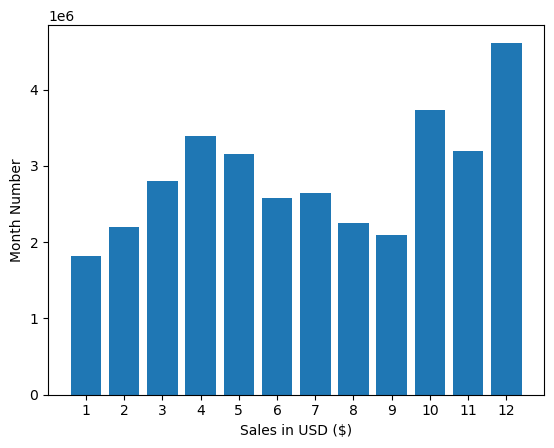

In [24]:
months = range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.xlabel("Sales in USD ($)")
plt.ylabel("Month Number")
plt.show()

### Question 2: what city has the highest number of sales

In [25]:
results = df.groupby("City").sum()

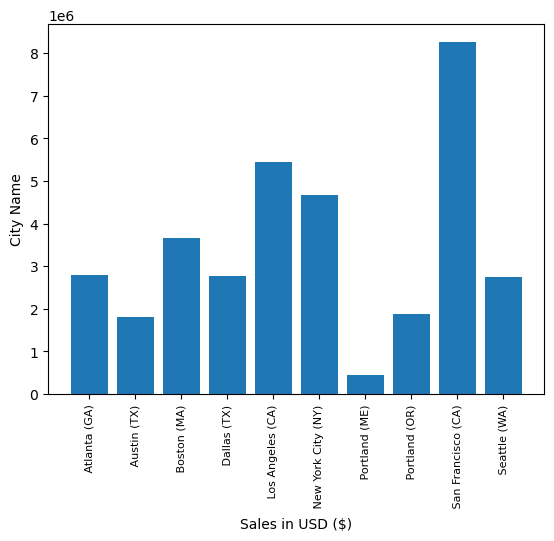

In [27]:
cities = [city for city, df in df.groupby("City")]
plt.bar(cities,results['Sales'])
plt.xticks(cities,rotation = "vertical", size = 8)
plt.xlabel("Sales in USD ($)")
plt.ylabel("City Name")
plt.show()

### Question 3: what time should we display advertisemeent to maximize likelihood of a customer's buying product

In [28]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [32]:
df["Hour"] = df["Order Date"].dt.hour
df["Munite"] = df["Order Date"].dt.minute

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Munite
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


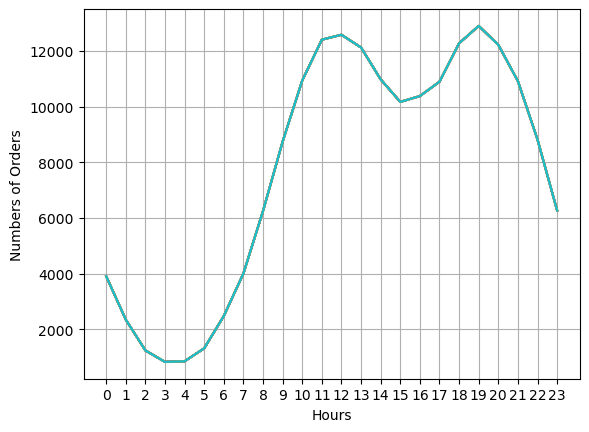

In [33]:
hours = [hour for hour, df in df.groupby("Hour")]
plt.plot(hours, df.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel("Hours")
plt.ylabel("Numbers of Orders")
plt.grid()
plt.show()
#my recomendation is arround 11am (11) 0r 7pm (19)

### Question 4: what products should most often sold together

In [35]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Munite
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [41]:
dff  = df[df["Order ID"].duplicated(keep = False)]

dff["Grouped"] = dff.groupby("Order ID")["Product"].transform(lambda x: ',' .join(x))


dff = dff[["Order ID","Grouped"]].drop_duplicates()

dff.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [71]:
#df.head()

In [42]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in dff["Grouped"]:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key,value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question 5: what products sold the most ? and why do you think it sold the most ?.

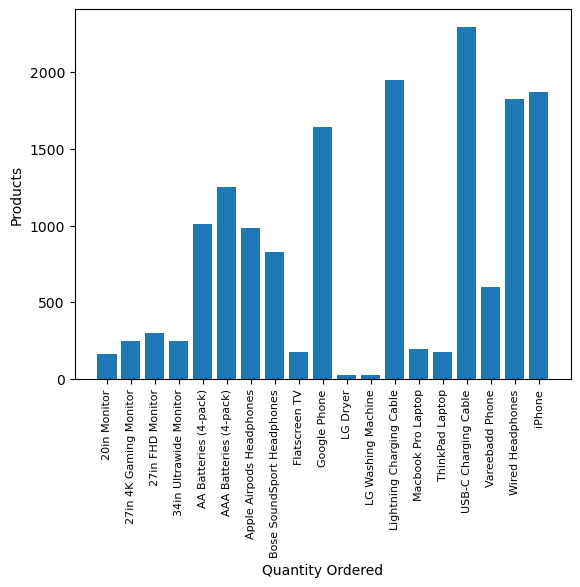

In [48]:
p_group = df.groupby("Product")
q_ordered = p_group.sum()["Quantity Ordered"]

products = [product for product, df in p_group]

plt.bar(products, q_ordered)
plt.xticks(products, rotation = "vertical", size = 8)
plt.xlabel("Quantity Ordered")
plt.ylabel("Products")
plt.show()






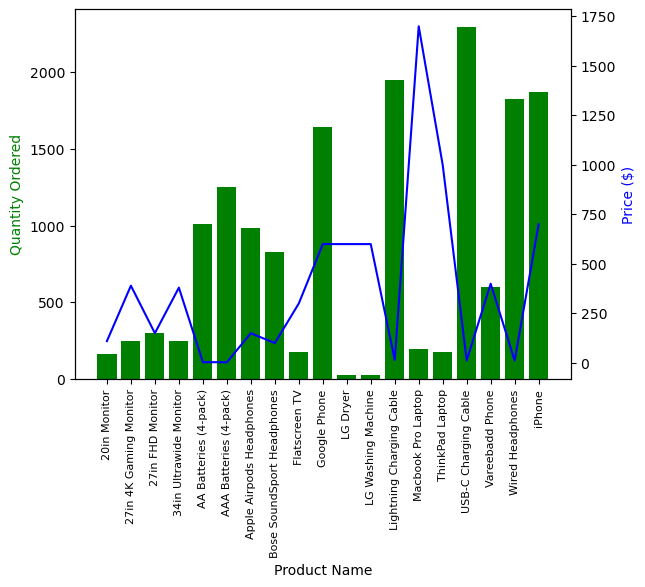

In [56]:
prices = df.groupby("Product").mean()["Price Each"]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,q_ordered,color = "g")
ax2.plot(products,prices,"b-")

ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Ordered", color = "g")
ax2.set_ylabel("Price ($)", color = "b")
ax1.set_xticklabels(products, rotation = "vertical", size = 8)

plt.show()